## Importando librerías

In [1]:
import tensorflow as tf
from tensorflow.keras import models, optimizers, regularizers
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Creación del modelo

In [2]:
# Modelo
model = models.Sequential()
# Convolución 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2, 2))
# Convolución 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
# Convolución 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
# Convolución 4
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
# Aplanar
model.add(Flatten())
# Capa densa 1
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
# Capa densa 2
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

## Data augmentation

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255, # Normalizar los valores de los pixeles
    rotation_range=40, # Rango de rotación
    width_shift_range=0.2, # Rango de traslación horizontal
    height_shift_range=0.2, # Rango de traslación vertical
    shear_range=0.2, # Rango de deformación
    zoom_range=0.2, # Rango de zoom
    horizontal_flip=True, # Voltear horizontalmente
)

## Reescalar los datos

In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = train_datagen.flow_from_directory( # Generador de datos de entrenamiento
    '../data/cats_and_dogs/train', # Directorio de entrenamiento
    target_size=(150, 150), # Tamaño de las imágenes
    batch_size=32, # Tamaño del batch
    class_mode='binary' # Modo de clasificación
)
validation_generator = test_datagen.flow_from_directory( # Generador de datos de validación
    '../data/cats_and_dogs/validation', # Directorio de validación
    target_size=(150, 150), # Tamaño de las imágenes
    batch_size=32, # Tamaño del batch
    class_mode='binary' # Modo de clasificación
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Callbacks

In [6]:
checkpoint = ModelCheckpoint( # Callback para guardar el modelo
    '../models/model_cats_and_dogs.hdf5', # Nombre del archivo
    monitor='val_accuracy', # Métrica a monitorear
    verbose=1, # Verbosidad
    save_best_only=True # Guardar solo el mejor modelo
)

## Compilación del modelo

In [7]:
model.compile( # Compilación del modelo
    loss='binary_crossentropy', # Función de pérdida
    optimizer=optimizers.Adam(), # Optimizador
    metrics=['accuracy'] # Métricas a monitorear
)

## Entrenamiento del modelo

In [8]:
hist = model.fit( # Entrenamiento del modelo
    train_generator, # Generador de datos de entrenamiento
    steps_per_epoch=2000//32, # Pasos por época
    epochs=100, # Número de épocas
    validation_data=validation_generator, # Generador de datos de validación
    validation_steps=1000//32, # Pasos por validación
    callbacks=[checkpoint] # Callbacks
)

Epoch 1/100
62/62 [==============================] - ETA: 0s - loss: 0.6946 - accuracy: 0.5346
Epoch 1: val_loss improved from inf to 0.69847, saving model to model_cats_and_dogs.hdf5
62/62 [==============================] - 125s 2s/step - loss: 0.6946 - accuracy: 0.5346 - val_loss: 0.6985 - val_accuracy: 0.4980
Epoch 2/100
62/62 [==============================] - ETA: 0s - loss: 0.6938 - accuracy: 0.4939
Epoch 2: val_loss improved from 0.69847 to 0.68996, saving model to model_cats_and_dogs.hdf5
62/62 [==============================] - 28s 457ms/step - loss: 0.6938 - accuracy: 0.4939 - val_loss: 0.6900 - val_accuracy: 0.5877
Epoch 3/100
62/62 [==============================] - ETA: 0s - loss: 0.6917 - accuracy: 0.5320
Epoch 3: val_loss did not improve from 0.68996
62/62 [==============================] - 27s 438ms/step - loss: 0.6917 - accuracy: 0.5320 - val_loss: 0.6916 - val_accuracy: 0.5010
Epoch 4/100
62/62 [==============================] - ETA: 0s - loss: 0.6828 - accuracy: 0.54

## Resultados

In [9]:
import matplotlib.pyplot as plt

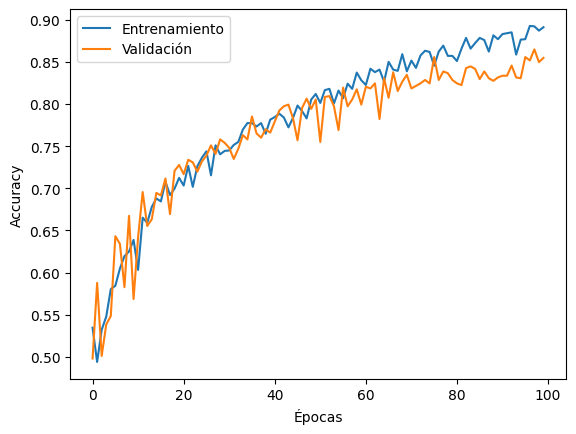

In [10]:
plt.plot(hist.history['accuracy'], label='Entrenamiento')
plt.plot(hist.history['val_accuracy'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [11]:
test_generator = test_datagen.flow_from_directory( # Generador de datos de prueba
    '../data/cats_and_dogs/test', # Directorio de prueba
    target_size=(150, 150), # Tamaño de las imágenes
    batch_size=32, # Tamaño del batch
    class_mode='binary' # Modo de clasificación
)

Found 1000 images belonging to 2 classes.


In [12]:
model2 = model
model2.load_weights('../models/model_cats_and_dogs.hdf5') # Cargar los pesos del modelo

In [13]:
model2.evaluate(test_generator) # Evaluación del modelo

32/32 [==============================] - 31s 987ms/step - loss: 0.4219 - accuracy: 0.8350


[0.42189133167266846, 0.8349999785423279]